In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [10]:
df = pd.read_csv('Student_performance_data _.csv')

In [12]:
df.info

<bound method DataFrame.info of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tut

In [11]:
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [13]:
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


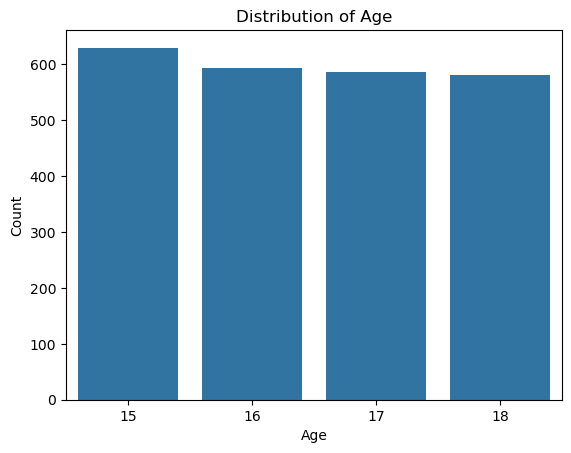

In [15]:
sns.countplot(data=df, x='Age')
plt.title(f'Distribution of Age')
plt.ylabel('Count')
plt.show()

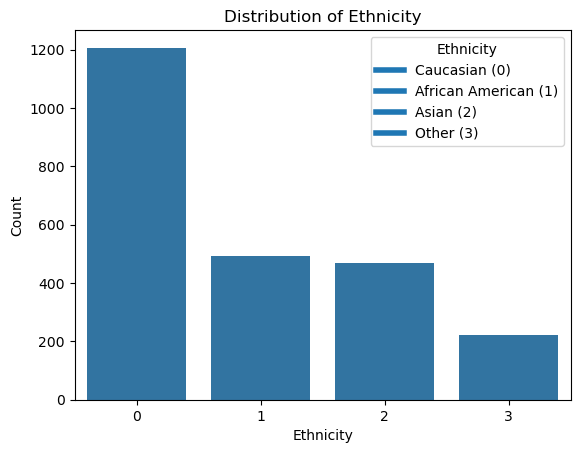

In [16]:
sns.countplot(data=df, x='Ethnicity')
plt.title(f'Distribution of Ethnicity')
plt.ylabel('Count')
handles = [
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
]
labels = ['Caucasian (0)', 'African American (1)', 'Asian (2)', 'Other (3)']
plt.legend(handles=handles, labels=labels, title='Ethnicity', loc='best')
plt.show()

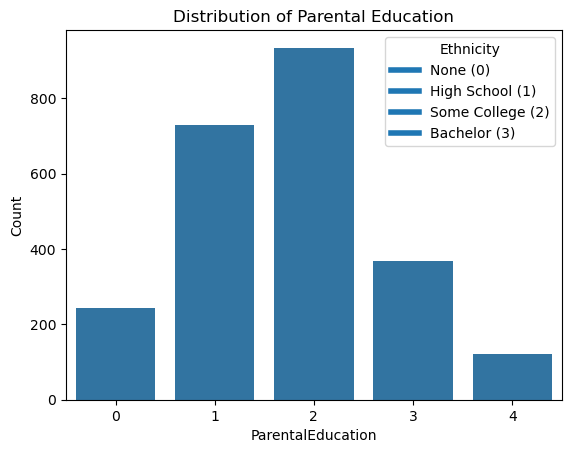

In [17]:
sns.countplot(data=df, x='ParentalEducation')
plt.title(f'Distribution of Parental Education')
plt.ylabel('Count')
handles = [
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
]
labels = ['None (0)', 'High School (1)', 'Some College (2)', 'Bachelor (3)', 'Higher (4)']
plt.legend(handles=handles, labels=labels, title='Ethnicity', loc='best')
plt.show()

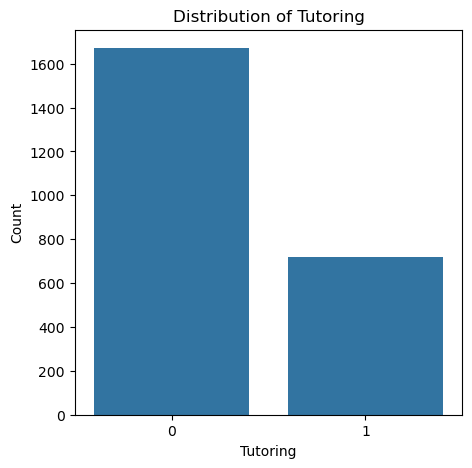

In [18]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Tutoring')
plt.title(f'Distribution of Tutoring')
plt.ylabel('Count')
plt.show()

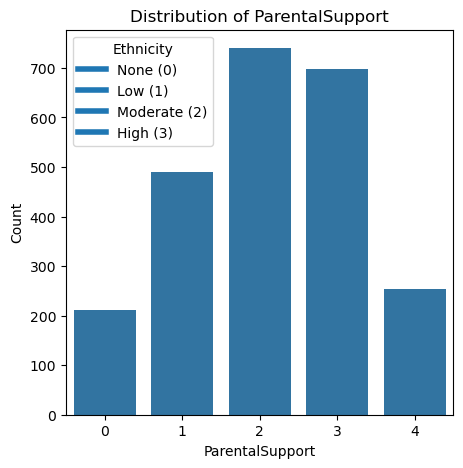

In [19]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='ParentalSupport')
plt.title(f'Distribution of ParentalSupport')
plt.ylabel('Count')
handles = [
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
    plt.Line2D([0], [0], lw=4),
]
labels = ['None (0)', 'Low (1)', 'Moderate (2)', 'High (3)', 'Very High (4)']
plt.legend(handles=handles, labels=labels, title='Ethnicity', loc='best')
plt.show()

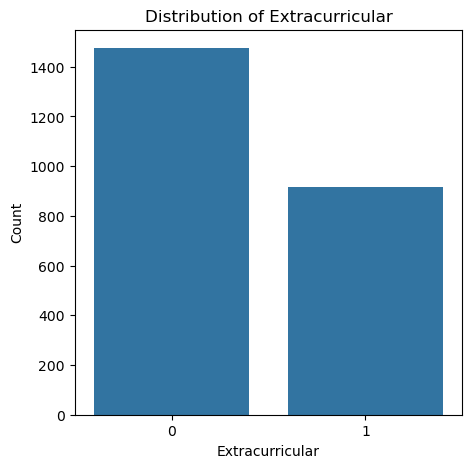

In [20]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Extracurricular')
plt.title(f'Distribution of Extracurricular')
plt.ylabel('Count')
plt.show()

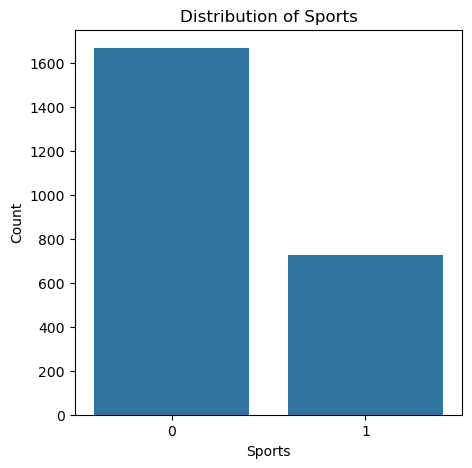

In [25]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Sports')
plt.title(f'Distribution of Sports')
plt.ylabel('Count')
plt.show()

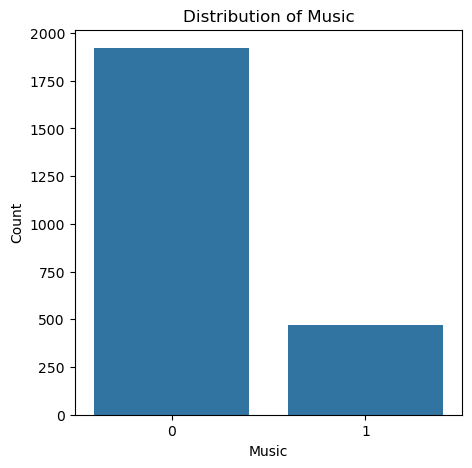

In [22]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Music')
plt.title(f'Distribution of Music')
plt.ylabel('Count')
plt.show()

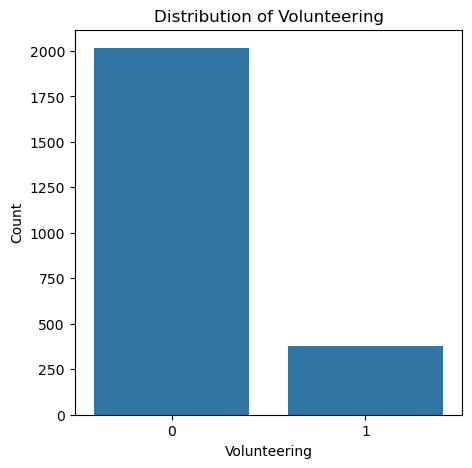

In [26]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Volunteering')
plt.title(f'Distribution of Volunteering')
plt.ylabel('Count')
plt.show()

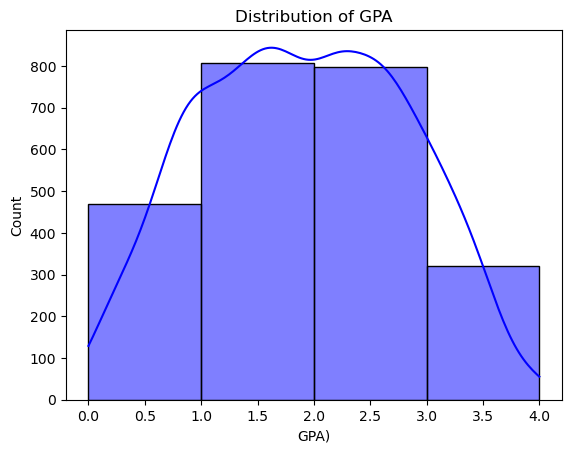

<bound method DataFrame.count of       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2          1003   15       0          2                  3         4.210570   
4          1005   17       1          0                  2         4.672495   
7          1008   15       1          1                  4        15.424496   
11         1012   17       0          0                  1         7.598486   
12         1013   17       0          1                  1        10.038712   
...         ...  ...     ...        ...                ...              ...   
2382       3383   16       0          0                  3        13.941823   
2383       3384   16       1          2                  2        11.736409   
2385       3386   16       1          0                  1         1.445434   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   

      Absences  Tu

In [27]:
sns.histplot(df['GPA'], bins=4, kde=True, color='blue')
plt.title('Distribution of GPA')
plt.xlabel('GPA)')
plt.ylabel('Count')
plt.show()
print(df[df['GPA'] <= 2.0].count)

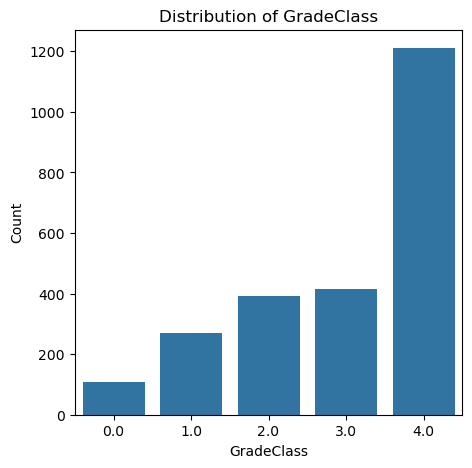

In [30]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='GradeClass')
plt.title(f'Distribution of GradeClass')
plt.ylabel('Count')
plt.show()

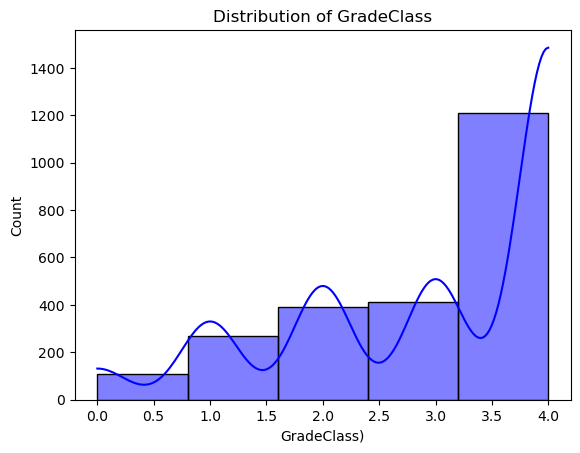

In [29]:
sns.histplot(df['GradeClass'], bins=5, kde=True, color='blue')
plt.title('Distribution of GradeClass')
plt.xlabel('GradeClass)')
plt.ylabel('Count')
plt.show()

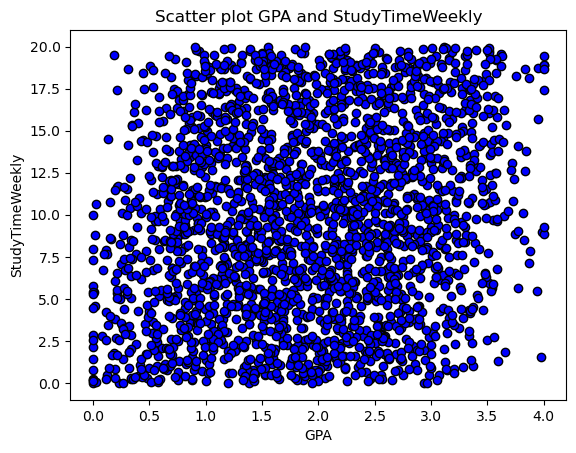

In [31]:
plt.scatter(df['GPA'], df['StudyTimeWeekly'], color='blue', edgecolor='black',)
plt.title('Scatter plot GPA and StudyTimeWeekly')
plt.xlabel('GPA')
plt.ylabel('StudyTimeWeekly')
plt.show()

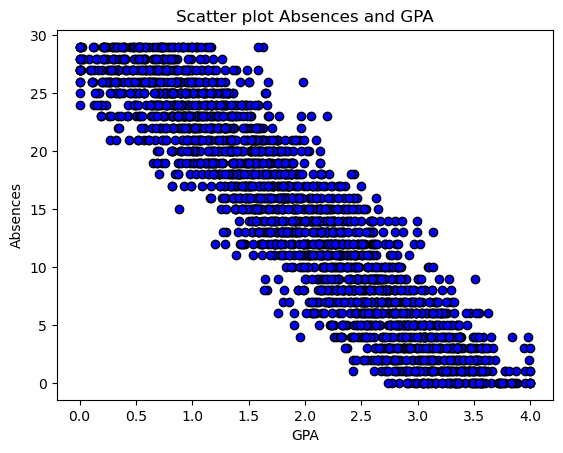

In [32]:
plt.scatter(df['GPA'], df['Absences'], color='blue', edgecolor='black',)
plt.title('Scatter plot Absences and GPA')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.show()

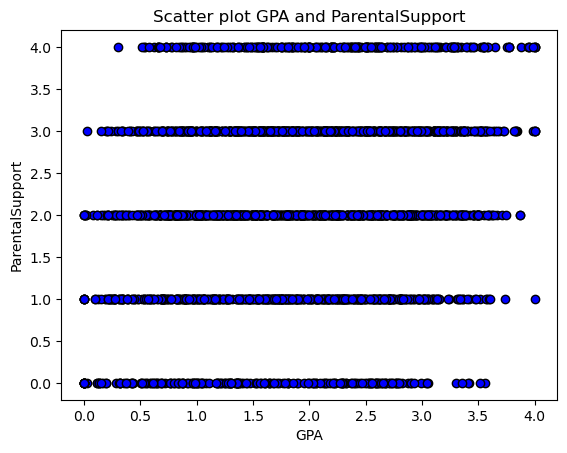

In [33]:
plt.scatter(df['GPA'], df['ParentalSupport'], color='blue', edgecolor='black',)
plt.title('Scatter plot GPA and ParentalSupport')
plt.xlabel('GPA')
plt.ylabel('ParentalSupport')
plt.show()

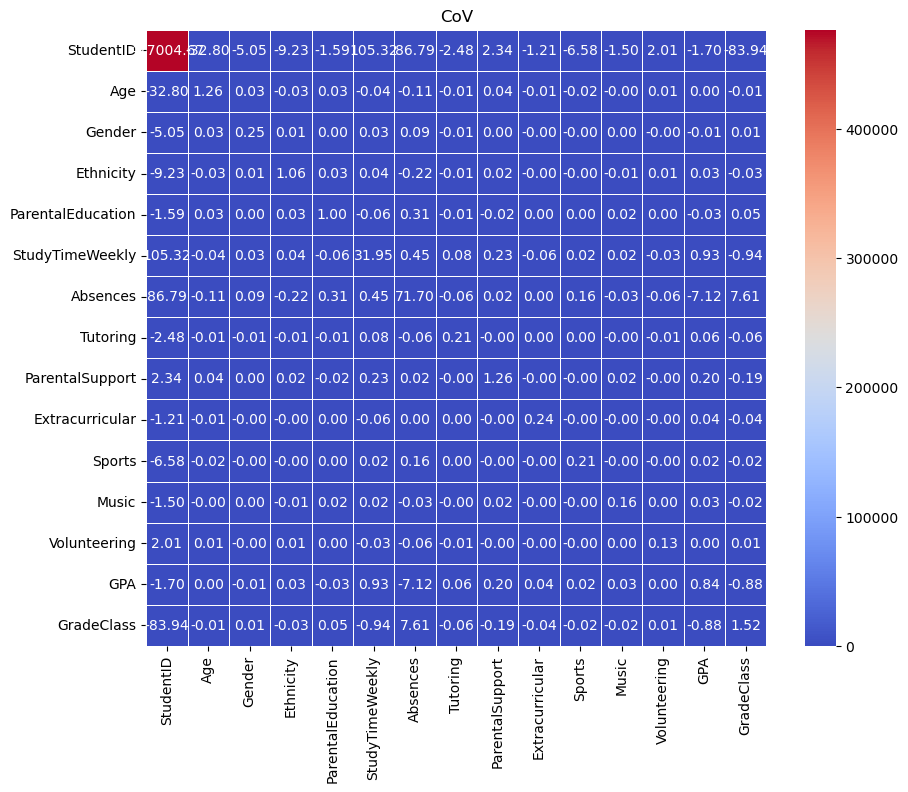

In [34]:
cov_matrix = df.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('CoV')
plt.show()

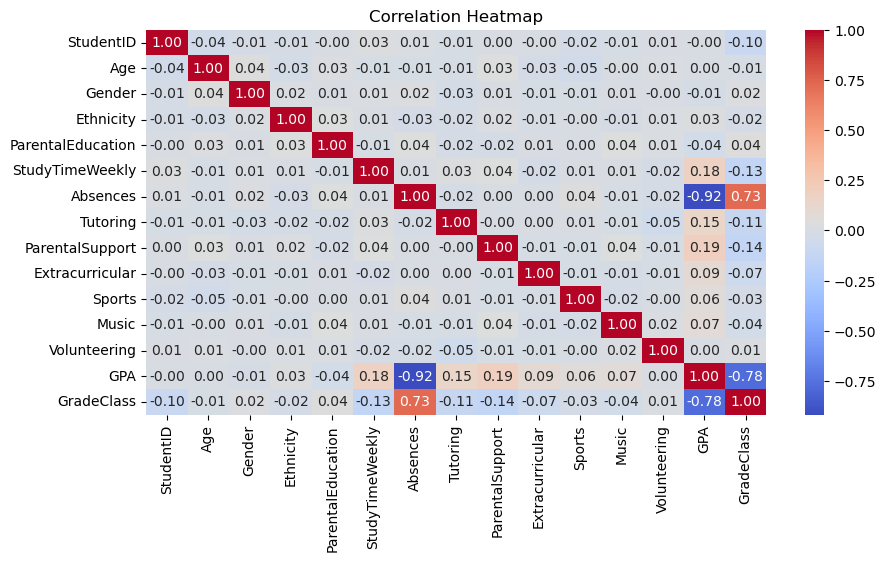

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Separate features (X) and target variable (y)
X = df.loc[:, df.columns != "GradeClass"]
y = df['GradeClass']

In [42]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'depth': 7, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Best cross-validation F1-score: 0.9307
Accuracy = 0.9150, F1-score = 0.8588
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.59      0.72        32
         1.0       0.80      0.91      0.85        81
         2.0       0.92      0.85      0.88       117
         3.0       0.84      0.90      0.87       124
         4.0       0.97      0.97      0.97       364

    accuracy                           0.92       718
   macro avg       0.89      0.85      0.86       718
weighted avg       0.92      0.92      0.91       718



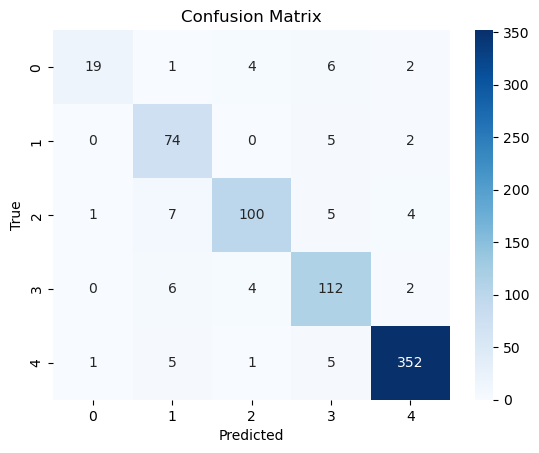

In [46]:
# Define your chosen model
model = CatBoostClassifier(verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform GridSearchCV with 5-fold cross-validation 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()